In [1]:
import os
import pandas as pd

In [112]:
df = pd.read_json(os.path.join('data','martinus_vyslo.json'))

In [113]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_tagy', 'M_počet_stran',
       'M_vazba', 'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání',
       'M_jazyk', 'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena',
       'M_obálka', 'M_ebook', 'M_audiokniha', 'M_datum', 'M_soubor',
       'M_podtitul', 'M_série', 'M_díl', 'M_edice', 'M_pro_koho', 'M_styl',
       'M_originální_název', 'M_věkové_doporučení', 'M_ilustrace',
       'M_účel_knihy', 'M_předběžné_datum_vydání', 'M_vydání', 'M_překlad',
       'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_editoři',
       'M_knižní_předloha'],
      dtype='object')

In [114]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_anotace', 'M_tagy', 'M_počet_stran',
       'M_vazba', 'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání',
       'M_jazyk', 'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena',
       'M_obálka', 'M_ebook', 'M_audiokniha', 'M_datum', 'M_soubor',
       'M_podtitul', 'M_série', 'M_díl', 'M_edice', 'M_pro_koho', 'M_styl',
       'M_originální_název', 'M_věkové_doporučení', 'M_ilustrace',
       'M_účel_knihy', 'M_předběžné_datum_vydání', 'M_vydání', 'M_překlad',
       'M_ostatní', 'M_příloha', 'M_jazyková_úroveň', 'M_editoři',
       'M_knižní_předloha'],
      dtype='object')

In [115]:
print(f"""martinus_vyslo.json:
- autorstva: {df.explode('M_autorstvo')['M_autorstvo'].nunique()}
- titulů: {df['M_titul'].nunique()}
- ISBN: {df['M_isbn'].nunique()}""")

martinus_vyslo.json:
- autorstva: 8478
- titulů: 12025
- ISBN: 11888


In [116]:
df['M_kategorizace'].drop_duplicates()

0                                [Knihy, Odborné a naučné]
1                  [Knihy, Společenská beletrie, Beletrie]
2                                [Knihy, Poezie, Beletrie]
4                                        [Knihy, Beletrie]
6        [Pro děti, Beletrie pro děti, Společenská bele...
                               ...                        
12184    [Motivace a seberozvoj, Odborné a naučné, Obch...
12188    [Náboženská literatura, Humanitní a společensk...
12192    [Knihy, Odborné a naučné, Chemie, Přírodní věd...
12199    [Životopisy, Studie, Beletrie, Životopisy, rep...
12203    [Thrillery, Humanitní a společenské vědy, Odbo...
Name: M_kategorizace, Length: 2038, dtype: object

In [103]:
df[df['M_titul'] == 'Fosilie']['M_kategorizace'].to_string()

'45    [Beletrie, Společenská beletrie, Knihy]'

In [117]:
df['isbn'] = df['M_isbn'].astype(str).apply(lambda x: x.replace(".0",""))
beletrie = df.explode('M_kategorizace')
beletrie = beletrie[beletrie['M_kategorizace'] == 'Beletrie']
beletrie

,M_titul,M_autorstvo,M_anotace,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha,isbn
1,Sen o lidské tváři,Ivan R. Vičar,Romeo a Julie jsou hrdiny středověkého příběhu...,"[sen, historie]",260.0,brožovaná vazba,130×200 mm,None,9788087373804,2024,...,None,NaN,None,None,None,None,None,None,None,9788087373804
2,Stopy osudu v čase,Mirka Langerová,Jmenuji se Mirka Langerová a narodila jsem se ...,"[radost, zbírka, romantika, smutek]",296.0,pevná vazba,120×184 mm,304 g,9788088363200,2021,...,None,NaN,None,None,None,None,None,None,None,9788088363200
3,Definice poezie,Michael Třeštík,"Definice poezie nejsou nic nového, už to napad...","[poezie, básně]",NaN,None,None,None,9788087545959,2024,...,None,NaN,None,None,None,None,None,None,None,9788087545959
4,Nasraná máma 1,Tereza Maroušková,Jak přežít těhotenství? Fakt nevim! Dula vám j...,"[porod, humor, těhotenství]",192.0,brožovaná vazba,143×201 mm,352 g,9788090815001,2021,...,None,NaN,None,None,None,None,None,None,None,9788090815001
5,Nutrie,Marek Toman,Jsme jako oni!Sametová revoluce pronikla až na...,"[jednota, láska, svoboda]",144.0,brožovaná vazba,None,None,9788074739156,2019,...,None,NaN,None,None,None,None,None,None,None,9788074739156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Poslední aristokratka,Evžen Boček,Tento titul je dostupný také jako komplet za v...,"[rodina, nový život, humor]",248.0,pevná vazba s přebalem,140×205 mm,348 g,9788072273201,2012,...,None,NaN,None,None,None,None,None,None,None,9788072273201
12206,Žítkovské bohyně,Kateřina Tučková,Vysoko v kopcích Bílých Karpat jsou řídce roze...,None,380.0,pevná vazba,140×210 mm,533 g,9788072945283,2012,...,None,NaN,None,None,None,None,None,None,None,9788072945283
12207,Báječná léta pod psa,Michal Viewegh,Moderní klasika z pera populárního spisovatele...,"[socialismus, dobová atmosféra, 20. století, p...",264.0,pevná vazba,146×185 mm,436 g,9788024936802,2018,...,None,NaN,None,None,None,None,None,None,None,9788024936802
12209,Zbabělci,Josef Škvorecký,Dnes už kultovní a také světově proslulý román...,"[historické události, 1945, autobiografický, d...",432.0,pevná vazba,139×204 mm,557 g,9788073354008,2015,...,None,NaN,None,None,None,None,None,None,None,9788073354008


In [122]:
kateg = beletrie.explode("M_kategorizace").groupby("M_kategorizace").size().nlargest(40)
kateg

M_kategorizace
Beletrie    6803
dtype: int64

In [121]:
tagy = beletrie.explode("M_tagy").groupby("M_tagy").size().nlargest(40)
tagy

M_tagy
láska              437
básně              333
satira             306
humor              290
rodina             242
vražda             236
vztahy             227
básnická sbírka    224
poezie             212
historie           181
společnost         175
vzpomínky          164
povídky            154
vyšetřování        148
život              139
česká poezie       130
přátelství         115
česká tvorba       113
příroda            102
tajemství          102
příběhy            101
fantasy            100
detektivka          95
minulost            85
básnická tvorba     84
politika            84
sci-fi              81
smrt                80
ze života           79
válka               77
dobrodružství       76
Česko               70
cestování           68
manželství          66
zvířata             62
napětí              60
sex                 59
války               59
krimi               55
smysl života        55
dtype: int64

In [134]:
df['M_podtitul'].dropna().to_list()

['Vrstvy, úrovně a fáze estetické zkušenosti',
 'Nekorektní průvodce těhotenstvím od početí k porodu',
 'Možná jsme všichni na světe sami',
 'Jedno malé městečko, dvě brutání vraždy',
 'Historické krimi z doby vlády Rudolfa II.',
 'Nevšední příběh ze světa politiky',
 'Nemožů být všici páni, mosijů být aj luďá',
 'Zlomek kroniky hor',
 'Český krimiromán',
 'verše 1953-1960',
 'Světy v plamenech',
 'Dokumentární povídky z jara, léta a podzimu 1945',
 'Komiksový manuál, jak přežít rodičovskou dovolenou',
 'Jak utišit bolest lásky',
 'Nebezpečné stvůry jsou všude…',
 'Kmoníček, Mendel, Pelikán a Tureček v rozhovorech o islámu a muslimském světe',
 'Fascinace 9',
 'aneb Když na Korfu kvetou mandloně',
 'Tahle dovolená je vážně za tres',
 'německo-české vydání',
 'postapokalyptický román',
 '12 pastelek, 1 sešit zábavných her, 1 sešit omalovánek',
 'Novela o osudu a naději',
 'Co když se rozhodnete pro život až ve chvíli, kdy ho ztrácíte?',
 'Kolekce',
 'Příběhy Oldřicha z Chlumu a středově

In [130]:
df[df['M_anotace'].str.lower().str.contains('nespoutan', na=False)]

,M_titul,M_autorstvo,M_anotace,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha,isbn
260,Boemo e Bastardella - sen probdělé noci,"[Jiří Raichl, M. A. Svobodová]",Horký srpen roku 1766.\nSladká Itálie překypuj...,"[historický román, zpěváci, Itálie, opery, 18....",240.0,brožovaná vazba,130×190 mm,246 g,9788088318262,2022,...,None,NaN,None,None,None,None,None,None,None,9788088318262
262,Bez zábran,Tereza Komorousová,"Příběh dvaadvacetileté dívky, která po těžkém ...",None,200.0,brožovaná vazba,130×200 mm,222 g,9788076502697,2021,...,None,NaN,None,None,None,None,None,None,None,9788076502697
384,Prokleté oči,Kateřina Maruchničová,"Natálie právě opouští dětský domov, kde po tra...","[pochopení, milostný vztah, tragický osud]",104.0,pevná vazba,133×210 mm,210 g,9788088363002,2020,...,None,NaN,None,None,None,None,None,None,None,9788088363002
476,Šílená babička,Martina Boučková,"Rodiče si nevybereš, někdy se před nimi ani ne...","[děti, vztahy, dospívání, rodičovství, manžels...",208.0,brožovaná vazba,145×205 mm,246 g,9788024755328,2024,...,None,NaN,None,None,None,None,None,None,None,9788024755328
535,Růže z Jericha,Michaela Štěchová,"Říká se, že láska hory přenáší. Jak se ale Mag...",None,256.0,brožovaná vazba,127×200 mm,345 g,9788076371194,2020,...,None,NaN,None,None,None,None,None,None,None,9788076371194
696,Bizarropolis,Roman Bílek,Antologie nespoutané fantastiky – česká odpově...,None,344.0,brožovaná vazba,140×210 mm,354 g,9788088243687,2022,...,None,NaN,None,Milan Žáček,None,None,None,None,None,9788088243687
837,Šumava tajemná,Veronika Rubínková,"Šumavské pralesy jsou nejen tajemné a děsivé, ...","[záhady, záhadné události, okultismus]",232.0,pevná vazba,130×180 mm,365 g,9788074280160,2009,...,None,NaN,None,None,None,None,None,None,None,9788074280160
1934,Café Groll,Jan Štifter,Poetický příběh lásky a vášně z jihočeských ne...,"[vášeň, historická romance, láska, nevěstinec]",160.0,pevná vazba,116×164 mm,212 g,9788076018082,2023,...,None,NaN,2,None,None,None,None,None,None,9788076018082
2065,Mezi dvěma světy,"[Nina Djakovičová, Jiří Hřebíček]",V přírodě mě ze všeho nejvíc fascinuje nespout...,"[ptáci, fotografie, fotografování]",68.0,pevná vazba,None,608 g,9788088412120,2022,...,None,NaN,None,None,None,None,None,None,None,9788088412120
2081,Souhvězdí slona,Ivo Skopal,Souhvězdí Persea pohasíná a nikdo neví proč. Ž...,"[příběhy, odvaha, život, humor, přátelství, sa...",374.0,pevná vazba,140×200 mm,556 g,9788074763502,2024,...,None,NaN,None,None,None,None,None,None,None,9788074763502


In [123]:
autorstvo = df['M_autorstvo'].drop_duplicates().to_list()
autorstvo

['Vlastimil Zuska',
 'Ivan R. Vičar',
 'Mirka Langerová',
 'Michael Třeštík',
 'Tereza Maroušková',
 'Marek Toman',
 'Alena Jakoubková',
 ['Jiří Mach', 'Richard Chaloupka'],
 'Klára Trnková',
 'Jaroslav Kalousek',
 'Jan Nemček',
 'Bohuslav Vaněk-Úvalský',
 'Beatrice Landovská',
 'Martin Trdla',
 'Bohuslav Březovský',
 'M.A. Isaac',
 'Vlasta Pittnerová',
 'Alžběta Bublanová',
 'Patrik Hartl',
 'Kristýna Trpková',
 'Lýdie Suková',
 'Zdeněk Grmolec',
 'Josef Fousek',
 'Miroslav Krůta',
 'Petr Denk',
 'Libor Kodl',
 'Miroslav Černý',
 'Eva Mašková',
 'Helena Veličková',
 'Pavla Horáková',
 'Jiří Severin',
 'Ivanka Devátá',
 'Petr Macek',
 'Miloš Gerstner',
 'Ivan Kraus',
 'Jana Štroblová',
 'Michaela Mitroci',
 'Daniel Janů',
 'František Uher',
 'František Kalenda',
 'Vladimír Procházka',
 'Petr Bým',
 'Naďa Horáková',
 'Jiří Stránský',
 'Petr Brožovský',
 'Miroslav Olšovský',
 ['Miroslav Macek', 'Zdeněk Jirotka'],
 'František Niedl',
 ['Marek Skřipský', 'Tomáš Bandžuch'],
 'Helena Žáková'

In [129]:
df[df['M_autorstvo'] == 'Vlastimil Vondruška'][['M_titul']].drop_duplicates()

,M_titul
134,Krev na kapradí
196,Právo první noci - Hříšní lidé Království česk...
208,Prokletí brněnských řeholníků
300,Dýka s hadem
509,Husitská epopej II.
...,...
6497,Mstitel z Jenštejna
7967,Lucemburská epopej II - Kralevic Karel (1334-1...
7976,Život ve staletích 14. století
11687,Úvahy a komentáře


In [4]:
df

,M_titul,M_autorstvo,M_ebook,M_anotace,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_ilustrace,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
0,Jindřich Chalupecký. Texty a kontexty kritika ...,Tomáš Pospiszyl,False,Kritik a teoretik umění Jindřich Chalupecký (1...,396.0,brožovaná vazba,150×220 mm,513 g,9788088366478,2023,...,None,None,NaN,None,None,None,None,None,None,None
1,Hra s formami 2,Eduardo Duran,False,"Vedomie je individuálne vnímanie, ktoré má kaž...",404.0,brožovaná vazba,135×205 mm,510 g,9798373986052,2023,...,None,None,NaN,None,None,None,None,None,None,None
2,"Práce, odvody a mzdy bez chyb, pokut a penále ...",None,False,Firemní školky jako benefit - Někteří zaměstna...,112.0,brožovaná vazba,None,None,9771801993457,2024,...,None,None,NaN,None,None,None,None,None,None,None
3,Daně v podnikání,Alena Vančurová Hana Zídková,/687657-dane-v-podnikani/e-kniha,"Publikace vychází již podruhé, v aktualizované...",368.0,brožovaná vazba,155×235 mm,544 g,9788076763593,2022,...,None,None,NaN,None,None,None,None,None,None,None
4,Budoucnost začíná teď,Lukáš Bujna,False,Během pandemie covidu si husitský farář a básn...,248.0,brožovaná vazba,150×210 mm,None,9788090788145,2023,...,None,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12723,V severnom vetre čítaš správy ďaleké,Martin Odler,False,Kniha V severnom vetre čítaš správy ďaleké je ...,208.0,pevná vazba,154×226 mm,490 g,9788082450296,2023,...,None,None,NaN,None,None,None,None,None,None,None
12724,Louka a spousta tance,Jakub Klikar,False,"Tato básnická sbírka obsahující třicet básní, ...",40.0,brožovaná vazba,140×210 mm,76 g,9788075682079,2020,...,None,None,NaN,None,None,None,None,None,None,None
12725,Z čeho je den,Dominika Prejdová,/708043-z-ceho-je-den/e-kniha,Román Dominiky Prejdové popisuje dynamiku a mi...,264.0,pevná vazba,135×208 mm,40 g,9788024275772,2021,...,None,None,NaN,None,None,None,None,None,None,None
12726,Krvavý Žižkov,Martin Reiner,/2879115-krvavy-zizkov/e-kniha,"Krvavý Žižkov je antologie, která má svého pře...",256.0,pevná vazba,150×210 mm,604 g,9788072279012,2024,...,None,None,NaN,None,None,None,None,None,None,None


In [5]:
df.columns

Index(['M_titul', 'M_autorstvo', 'M_ebook', 'M_anotace', 'M_počet_stran',
       'M_vazba', 'M_rozměr', 'M_hmotnost', 'M_isbn', 'M_rok_vydání',
       'M_jazyk', 'M_původ', 'M_nakladatel', 'M_kategorizace', 'M_cena',
       'M_datum', 'M_soubor', 'M_série', 'M_díl', 'M_edice', 'M_pro_koho',
       'M_e-kniha', 'M_přečtená', 'M_styl', 'M_originální_název',
       'M_věkové_doporučení', 'M_audiokniha', 'M_ilustrace', 'M_účel_knihy',
       'M_předběžné_datum_vydání', 'M_vydání', 'M_překlad', 'M_ostatní',
       'M_příloha', 'M_jazyková_úroveň', 'M_editoři', 'M_knižní_předloha'],
      dtype='object')

In [6]:
df['M_hmotnost'] = pd.to_numeric(df['M_hmotnost'].apply(lambda x: str(x).replace(" g","")), errors="coerce")

In [29]:
df['M_ilustrace'].drop_duplicates()

0                             None
19                  Tereza Králová
42                Petra Vybíhalová
75                     Milan Starý
197                   Libor Drobný
                   ...            
12616                    Pavel Růt
12631    Alena Brunhilda Oswaldová
12632                 Ditta Kůtová
12664                 Monika Foris
12708                  Quido Mánes
Name: M_ilustrace, Length: 533, dtype: object

In [135]:
df[df['M_titul'] == 'Fosilie']

,M_titul,M_autorstvo,M_anotace,M_tagy,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha,isbn
1221,Fosilie,Michal Kašpárek,"Tři generace, tři životní názory a postoje. Dě...","[rodina, mezigenerační problémy, vztahy]",184.0,brožovaná vazba,130×200 mm,224 g,9788076374003,2023,...,None,NaN,None,None,None,None,None,None,None,9788076374003


In [32]:
df.groupby('M_rozměr').size().nlargest()

M_rozměr
130×200 mm    714
145×205 mm    577
150×210 mm    341
140×200 mm    299
140×210 mm    281
dtype: int64

In [36]:
df['M_hmotnost'].median()

354.0

In [37]:
import numpy as np

In [43]:
tiha = np.array(df['M_hmotnost'])
tiha

array([513., 510.,  nan, ...,  40., 604., 140.])

In [49]:
np.percentile(tiha, 80)

nan

In [12]:
df[df['M_autorstvo'].str.contains('Prchal',na=False)]

,M_titul,M_autorstvo,M_ebook,M_anotace,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,...,M_ilustrace,M_účel_knihy,M_předběžné_datum_vydání,M_vydání,M_překlad,M_ostatní,M_příloha,M_jazyková_úroveň,M_editoři,M_knižní_předloha
1029,Vytváření konvertity,Hana Ferencová Iveta Coufalová Radmila Prchal ...,False,"Cílem autorského kolektivu bylo zjišťovat, jak...",484.0,pevná vazba,145×208 mm,680.0,9788074228056,2022,...,None,None,NaN,None,None,None,None,None,None,None
1764,"Odpadlíci, noví křesťané a obyvatelé zpapeženělí",Radmila Prchal Pavlíčková,False,Česká multikonfesní společnost se musela ve dv...,184.0,brožovaná vazba,120×193 mm,186.0,9788074229466,2024,...,None,None,NaN,None,None,None,None,None,None,None
6457,Pověsti z Vysočiny III.,Jan Prchal,False,"Třetí, závěrečná kniha příběhů, v nichž ožívaj...",158.0,pevná vazba,207×292 mm,753.0,9788087683934,2018,...,None,None,NaN,None,None,None,None,None,None,None
6890,Pověsti z Vysočiny II.,Jan Prchal,False,"Druhý svazek příběhů, které Jan Prchal vybral ...",142.0,pevná vazba,209×295 mm,695.0,9788087683811,2017,...,None,None,NaN,None,None,None,None,None,None,None


In [27]:
df.groupby('M_ilustrace').size().nlargest(20)

M_ilustrace
Helena Zmatlíková     15
Iva Hüttnerová        14
Adolf Born            12
Erika Bornová         11
Adéla Stopka          10
Miroslav Růžek         9
Eva Bartošová          8
Jiří Slíva             8
Petr Urban             6
Richard Šmarda         6
Tereza Basařová        6
Tereza Budilová        6
Daggy                  5
Filip Štorch           5
Kateřina Coufalová     5
Libor Drobný           5
Lubomír Kupčík         5
Sabina Chalupová       5
Andrea Tachezy         4
Atila Vörös            4
dtype: int64

In [14]:
df.groupby('M_rok_vydání').size()

M_rok_vydání
1997       1
1999       1
2000       3
2001       2
2002       6
2003       2
2004       2
2005       7
2006       6
2007      10
2008      13
2009      16
2010      19
2011      25
2012      29
2013      32
2014      32
2015      47
2016      64
2017     505
2018     669
2019     817
2020     740
2021    2193
2022    2997
2023    2693
2024    1625
2025       1
dtype: int64

<Axes: ylabel='Frequency'>

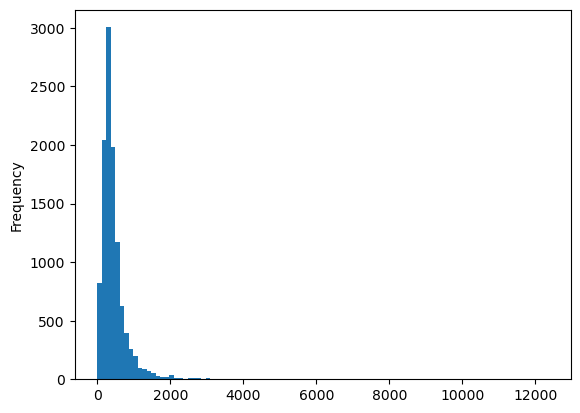

In [15]:
df['M_hmotnost'].plot.hist(bins=100)

In [16]:
df['M_hmotnost'].median()

354.0

In [20]:
df['M_rozměr']

0        150×220 mm
1        135×205 mm
2              None
3        155×235 mm
4        150×210 mm
            ...    
12723    154×226 mm
12724    140×210 mm
12725    135×208 mm
12726    150×210 mm
12727    148×210 mm
Name: M_rozměr, Length: 12557, dtype: object

In [17]:
df['M_počet_stran'].median()

210.0